## Auralin Clinical Trial Data Analysis

### Content Outline
1. [Description of Dataset](#topic1)
2. Table Descriptions
    - [`patients`: Table description](#topic2)
    - [`treatments`: Table description](#topic3)
    - [`adverse_reactions`: Table description](#topic7)
3. [Assessing the data](#topic4)
4. [Off Concepts](#topic5)
5. [Assessment issues](#topic6)
6. [Data Cleaning](#topic9)
7. [Analysis](#topic10)
8. [Conclusion](#topic11)

### Description of Dataset <a id='topic1'></a>

The is a phase II clinical trial dataset for the new drug Auralin (hypothetical). The drug is undegoing trials and its performance is measured against the efficacy of the currently administered one - Novodra.

>Auralin is supposed to be the new orally administered insulin for diabetics. Novodra is based on the prevailinng syringe-injected cure already available.

>This dataset is obtained from Udacity's data analysis course and was curated in close contanct with doctors to largely mimic a real trial dataset.

>In this notbook, we will only be assessing the data for **quality** and **tidiness** and noting our observations. Following that, the data will be cleaned and explored for insights.

The dataset has three tables that will described in more detail below, to beter understand the terms and their implications

In [2]:
# import the required libraries and make plots inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# load preview the patients dataset
patients =  pd.read_csv('patients.csv')
patients.head(10)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114.0,United States,386-334-5237RafaelCardosoCosta@gustr.com,8/31/1931,183.9,70,26.4
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728.0,United States,775-533-5933MaryBAdams@einrot.com,11/19/1969,146.3,65,24.3
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037.0,United States,XiuxiuChang@einrot.com1 408 778 3236,8/13/1958,158.0,60,30.9
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105.0,United States,816-265-9578DavidGustafsson@armyspy.com,3/6/1937,163.9,66,26.5
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011.0,United States,SophieCabreraIbarra@teleworm.us1 718 795 9124,12/3/1930,194.7,64,33.4


#### `patients`: Table description <a id='topic2'></a>

`patients` columns:
- **patient_id**: the unique identifier for each patient in the [Master Patient Index](https://en.wikipedia.org/wiki/Enterprise_master_patient_index) (i.e. patient database) of the pharmaceutical company that is producing Auralin
- **assigned_sex**: the assigned sex of each patient at birth (male or female)
- **given_name**: the given name (i.e. first name) of each patient
- **surname**: the surname (i.e. last name) of each patient
- **address**: the main address for each patient
- **city**: the corresponding city for the main address of each patient
- **state**: the corresponding state for the main address of each patient
- **zip_code**: the corresponding zip code for the main address of each patient
- **country**: the corresponding country for the main address of each patient (all United states for this clinical trial)
- **contact**: phone number and email information for each patient
- **birthdate**: the date of birth of each patient (month/day/year). The [inclusion criteria](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) for this clinical trial is  age >= 18 *(there is no maximum age because diabetes is a [growing problem](http://www.diabetes.co.uk/diabetes-and-the-elderly.html) among the elderly population)*
- **weight**: the weight of each patient in pounds (lbs)
- **height**: the height of each patient in inches (in)
- **bmi**: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m<sup>2</sup> where kg is a person's weight in kilograms and m<sup>2</sup> is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. *The [inclusion criteria](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) for this clinical trial is 16 >= BMI >= 38.*

In [4]:
# load preview the treatments dataset
treatments = pd.read_csv('treatments.csv')
treatments.head(10)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
5,jasmine,sykes,-,42u - 44u,7.56,7.18,0.38
6,sophia,haugen,37u - 42u,-,7.65,7.27,0.38
7,eddie,archer,31u - 38u,-,7.89,7.55,0.34
8,saber,ménard,-,54u - 54u,8.08,7.70,NaN
9,asia,woźniak,30u - 36u,-,7.76,7.37,NaN


#### `treatments`: Table description <a id='topic3'></a>
 
350 patients participated in this clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before.  All were experiencing elevated HbA1c levels.

All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After four weeks, which isn’t enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:
- 175 patients switched to Auralin for 24 weeks
- 175 patients continued using Novodra for 24 weeks

`treatments` columns:
- **given_name**: the given name of each patient in the Master Patient Index that took part in the clinical trial
- **surname**: the surname of each patient in the Master Patient Index that took part in the clinical trial
- **auralin**: the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) *and* the ending median daily dose of insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash). Both are measured in units (shortform 'u'), which is the [international unit](https://en.wikipedia.org/wiki/International_unit) of measurement and the standard measurement for insulin.
- **novodra**: same as above, except for patients that continued treatment with Novodra
- **hba1c_start**: the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin A1c. The [HbA1c test](https://depts.washington.edu/uwcoe/healthtopics/diabetes.html) measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.
- **hba1c_end**: the patient's HbA1c level at the end of the last week of treatment
- **hba1c_change**: the change in the patient's HbA1c level from the start of treatment to the end, i.e., `hba1c_start` - `hba1c_end`. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus Auralin).

In [5]:
# load preview the adverse reactions dataset
adverse_reactions = pd.read_csv('adverse_reactions.csv')
adverse_reactions.head(10)

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


#### `adverse_reactions`: Table description <a id='topic7><a/>

`adverse_reactions` columns:
- **given_name**: the given name of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- **surname**: the surname of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- **adverse_reaction**: the adverse reaction reported by the patient

Additional useful information:
- [Insulin resistance varies person to person](http://www.tudiabetes.org/forum/t/how-much-insulin-is-too-much-on-a-daily-basis/9804/5), which is why both starting median daily dose and ending median daily dose are required, i.e., to calculate change in dose.
- It is important to test drugs and medical products in the people they are meant to help. People of different age, race, sex, and ethnic group must be included in clinical trials. This [diversity](https://www.clinicalleader.com/doc/an-fda-perspective-on-patient-diversity-in-clinical-trials-0001) is reflected in the `patients` table.
- Ensuring column names are descriptive enough is an important step in acquainting yourself with the data. 'Descriptive enough' is subjective. Ideally you want short column names (so they are easier to type and read in code form) but also fully descriptive. Length vs. descriptiveness is a tradeoff and common debate (a [similar debate](https://softwareengineering.stackexchange.com/questions/176582/is-there-an-excuse-for-short-variable-names) exists for variable names). The *auralin* and *novodra* column names are probably not descriptive enough, but you'll address that later so don't worry about that for now.

## Assessing the data <a id='topic4'></a>

>Data assessment can be done in two ways, programmatically or visually.

>Programmtic assesssment is using code to seek for features of the dataset, while visual assessment is simly opening the data filein a spread sheet application or using pandas and look through the rows of it.

>Directed visual assessment is when we have something in mind to discover about our dataset, whereas undirected visual assessment is randomly scrolling through it to find something out of place.



In [6]:
patients.query('bmi == 27') #select the row where the bmi is 27

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
153,154,male,John,Carreiro,1463 Martha Ellen Drive,Reno,NV,89509.0,United States,JohnACarreiro@superrito.com1 775 770 7827,4/8/1976,177.8,68,27.0


*Assessment is usually guided by what we want to analyse, and for this dataset, our key metric is the __change in the hba1c levels__*

>The hba1c level indicates how much blood sugar there has been for a few months back. If we get the change between sstarting the trial and at its end, we can deduce how well Auralin worked compared to Novodra.

In [7]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [8]:
patients[patients.address.isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


### Off Concepts <a id='topic5'></a>

### Dirty Data

>Data is said to be dirt or low quality when it has some quality issues dealing with the __content__ of the dataset.

>The data quality dimensions best describe how dirty a dataset is and its cause.

- __completeness__ checks if we have the data that we want or are they missing eg NAN
- __Validity__ means that the data is present but a data point or set of data points don't conform to a defined schema eg having negative values for height or age. Its not a possible occerence
- __Accuracy__ checks whether the data points have the correct values they should hold eg recording someone's temperature reading as 65degrees rather than 85. it is not accurate
- __Consistency__ checks  to ensure that there is a unifirm way of identifying things in the dataset. eg. surname column is not called last name in another table, using capital letters for names and lowercase fo rsame names in another table.

### Data Quality Dimensions
- Completeness
- Validity
- Accuracy
- Consistency 


While assessing our data, we could use programmatic assesssment to spot out issues. Some programmatic assessment techniques are 
- info() method
- describe()
- sample()


### __Assessment issues__ <a id='topic6'></a>

#### __Quality__

`patients` table:
- zip codes are floats and not strings
- state column sometimes in full, other times abbreviated
- Tim Neudorf height is 27 instead of 72
- zip_code column sometimes has four digits instead of 5
- patient with patient id 9 is spelt Dsvid and not David
- some missing demographics data (eg, adress, city, state)
- erroneous datatypes
 
`treatments` table

- missing data in the hba1c change column
- missing data some rows of data, as total trial was 350, but records are 280
- the 'u' in start and end dose on treatments table
- patients names are in lower case and not title case
- erroneous datatypes
- inaccurate hba1c changes

`adverse_reactions` table
- patient names are in lower case




#### Tidiness
>Data can also be said to be messy or untidy. Tidiness deals with structural issues of the data set

>This resulsts when the ataset does not conform to the following:

- each variable forms a column
- each obersavation froms a row
- each type of observationat unit forms a table

### __Tidiness__ Issues
`patients` table
- contact column contains two variables

`treatments` table
- contains three columns in two variables

`adverse reaction` table
- table should be combined with the treatments table 

_when we join the adverse_reaction and treatment tables we'll also drop the duplicated name columns. Hence, only the patients table will have names in it. The primary key for the both tables will however be the **patients id** whch doesn't change_

## Data Cleaning <a id='topic9'></a>

After identifying the tidiness and quality issues in the dataset, now we will clean out those issues.
>To begin, the typical order to approach cleaning will be to follow the data quality dimentions already noted.

- Completeness
- Validity
- Accuracy
- Consistency

>However, once we have tackled completeness issues it is more important to handle the tidiness issues next.

>This is because untidy data makes our cleaning process more difficult as we progress. Thus, we must ensure all the tables are as they should before we start addressing the individual issues.

> After the tidiness operation, we will continue to the next data dimension quality issue (validity and so on).


#### Process
The cleaning process will be preformed systematically under the following captions:
>**Define**

Define the cleaning operation to be performed
>**Code**

Write the code to perfrom the operation
>**Test**

Test to confirm that our code worked as it should on the dataset

#### Create a Copy for each table

**Must-Do**

Before performing cleaning operations on any dataset, we must create a copy for that dataset and retain the original as it is.

All cleaning operations must be performed on the copy not the main dataset (much like a back up).

In [29]:
# create a copy for each dataframe before cleaning
patients_copy = patients.copy()
treatments_copy = treatments.copy()
adverse_reactions_copy = adverse_reactions.copy()


### Cleaning all missing records first

We have been provided with extra rows of data for the treatments table, we will append it to our main table by concatenating


#### Define
Append the new rows of treatments table data to the copied df

#### Code

In [30]:
treatments_cut = pd.read_csv('treatments_cut.csv')
# combine the two tables for complete patient records
treatments_copy = pd.concat([treatments_copy, treatments_cut], ignore_index = True)

#### Test

In [31]:
treatments_copy.shape

(350, 7)

#### Define

>Drop rows with missing demographics data (eg, adress, city, state) in patients table

>Implement right operation for missing data in the hba1c change column in treatments table

#### Code


In [32]:

# obtain the indexes of row with missing addresses
missing_address = patients_copy[patients_copy.address.isnull()].index

# drop those rows wit missing addresses
patients_copy.drop(index=missing_address, axis=0, inplace=True)

# recalculate the hba1c change column to fill all the missing values in
treatments_copy.hba1c_change = treatments_copy.hba1c_start - treatments_copy.hba1c_end

#### Test

In [33]:
# confirm that no more rows have missing addresses
patients_copy[patients_copy.address.isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi


In [34]:
# confrim that no more NAN values in hba1c change column
treatments_copy.sample(5)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
26,suhaim,rahal,-,49u - 47u,7.94,7.50,0.44
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
279,samúel,guðbrandsson,53u - 56u,-,8.00,7.64,0.36
254,jose,combs,-,39u - 36u,7.89,7.42,0.47
155,russom,amanuel,-,39u - 36u,7.86,7.40,0.46


### Moving On

So, we are done with addressing the completeness issues, we need to prepare our dtaset structure to enable us perform the required operations smoothly.

#### Define

- contact column contains two variables patients
- contains three columns in two variables treatment 
- adverse reactions table should be combined with the treatments table
- given name and surname columns are duplicated (ie unnecessary for both tables) for adverse reactions and treatments 

#### Code

In [35]:
# preview the dataset
patients_copy.head()

# import the regex library to enable pattern matching in the dataset
import re

In [36]:
# assign the regex pattern and extract matches from the dataset for phone numbers
phone_regex = r"((\+[0-9].)?(\(\d{3}\).)?([0-9].)?(\d{3}.)?(\d{3}.)(\d{4}))"
patients_copy['phone_number'] = patients_copy.contact.str.extract(pat=phone_regex)[0]

#### Test

In [37]:
patients_copy.sample(5)

patients_copy[patients_copy.phone_number.isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,phone_number


#### Code

In [38]:
# assign the regex pattern and extract matches from the dataset for emails
email_pattern = r"([A-Za-z][A-Za-z0-9.]*@[a-z]*\.[a-z]*)"
patients_copy['email'] = patients_copy.contact.str.extract(pat=email_pattern)

#### Test

In [39]:
print(patients_copy.email.isnull().sum())

patients_copy.sample(5)

0


,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,phone_number,email
198,199,female,Eufrosina,Schiavone,1984 Counts Lane,Lexington,KY,40507.0,United States,EufrosinaSchiavone@cuvox.de+1 (859) 977-9462,4/6/1926,108.5,62,19.8,+1 (859) 977-9462,EufrosinaSchiavone@cuvox.de
387,388,female,Vallie,Prince,550 Mulberry Lane,Fort Lauderdale,FL,33301.0,United States,561-826-5683VallieSPrince@cuvox.de,1/16/1998,152.7,67,23.9,561-826-5683,VallieSPrince@cuvox.de
352,353,male,Marek,﻿Dvořák,633 Better Street,Savannah,GA,31401.0,United States,912-988-6655MarekDvorak@gustr.com,12/19/1966,227.7,67,35.7,912-988-6655,MarekDvorak@gustr.com
187,188,male,Władysław,Wieczorek,2338 Virginia Street,Chicago,IL,60605.0,United States,773-607-2647WladyslawWieczorek@teleworm.us,1/15/1994,133.1,67,20.8,773-607-2647,WladyslawWieczorek@teleworm.us
361,362,male,Hans Peter,Radislav,208 Birch Street,El Paso,TX,79905.0,United States,HansPeterRadislav@gustr.com915-612-1462,10/28/1973,169.0,70,24.2,915-612-1462,HansPeterRadislav@gustr.com


In [40]:
# drop the contact column
patients_copy.drop(columns = 'contact', inplace=True)
patients_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    491 non-null    int64  
 1   assigned_sex  491 non-null    object 
 2   given_name    491 non-null    object 
 3   surname       491 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   birthdate     491 non-null    object 
 10  weight        491 non-null    float64
 11  height        491 non-null    int64  
 12  bmi           491 non-null    float64
 13  phone_number  491 non-null    object 
 14  email         491 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 61.4+ KB


#### Define
create the three columns contained in the two variables on the treatment table

#### code


In [41]:
treatments_copy.head()

# melt the treatment drug columns into a single 'treatment' column
treatments_copy = pd.melt(treatments_copy, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'], value_vars=['auralin', 'novodra'],
 var_name='treatment', value_name = 'dosage', ignore_index=True)

treatments_copy.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dosage
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
1,elliot,richardson,7.56,7.09,0.47,auralin,-
2,yukitaka,takenaka,7.68,7.25,0.43,auralin,-
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
4,alissa,montez,7.78,7.46,0.32,auralin,-


#### Define

Expand the dosage column of treatment table to separate start dose from end dose and remove the unit sign (U)

In [42]:
treatments_copy['start_dose'] = treatments_copy.dosage.str.split(' - ').str[0].str[:2]
treatments_copy['end_dose'] = treatments_copy.dosage.str.split(' - ').str[1].str[:2]

#### Test

In [43]:
treatments_copy.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dosage,start_dose,end_dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u,41,48
1,elliot,richardson,7.56,7.09,0.47,auralin,-,-,NaN
2,yukitaka,takenaka,7.68,7.25,0.43,auralin,-,-,NaN
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u,33,36
4,alissa,montez,7.78,7.46,0.32,auralin,-,-,NaN


In [44]:
# drop all the NAN rows in start and end dose in treatments table
treatments_copy.dropna(axis=0, inplace = True)
treatments_copy.drop(columns = 'dosage', inplace=True)

#### Test

In [45]:
treatments_copy.reset_index(inplace=True, drop=True)
treatments_copy.tail(5)

treatments_copy.shape

treatments_copy[treatments_copy.given_name == 'elliot']

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose
175,elliot,richardson,7.56,7.09,0.47,novodra,40,45


#### Define
combine the adverse reactions table with the treatments table by merging them

#### Code

In [46]:
adverse_reactions_copy.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [47]:
# merge the two tables on given names and surnames
treatments_copy = treatments_copy.merge(adverse_reactions_copy, how='left', on=['given_name', 'surname'])

#### Define
Since given name and surname columns are duplicated treatments table now, make the common identifier between patient and treatemnt table be the patient id. Drop the names from the treatments table

#### Code

In [48]:

# create a df containing only the given name, surname and patiednt id from the patients table
df_id = patients_copy[['patient_id', 'given_name', 'surname']].copy()
df_id


,patient_id,given_name,surname
0,1,Zoe,Wellish
1,2,Pamela,Hill
2,3,Jae,Debord
3,4,Liêm,Phan
4,5,Tim,Neudorf
...,...,...,...
498,499,Mustafa,Lindström
499,500,Ruman,Bisliev
500,501,Jinke,de Keizer
501,502,Chidalu,Onyekaozulu


In [49]:
# convert the letter case in the df_id table to lower case to match with treatment table
df_id.given_name = df_id.given_name.str.lower()
df_id.surname = df_id.surname.str.lower()

In [50]:
# merge the new df with the treatments table on the given name and surname
treatments_copy = df_id.merge(treatments_copy, how ='inner', on=['given_name', 'surname'])

#### Test

In [51]:
treatments_copy.head()

,patient_id,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose,adverse_reaction
0,1,zoe,wellish,7.71,7.30,0.41,novodra,33,33,NaN
1,2,pamela,hill,9.53,9.10,0.43,novodra,27,29,NaN
2,4,liêm,phan,7.58,7.10,0.48,novodra,43,48,NaN
3,6,rafael,costa,7.73,7.34,0.39,auralin,50,60,NaN
4,7,mary,adams,7.65,7.26,0.39,novodra,32,33,NaN


In [52]:
# drop the given name and surname columns 
treatments_copy.drop(columns = ['given_name', 'surname'], inplace=True)
treatments_copy.reset_index(inplace=True, drop=True)
treatments_copy

,patient_id,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose,adverse_reaction
0,1,7.71,7.30,0.41,novodra,33,33,NaN
1,2,9.53,9.10,0.43,novodra,27,29,NaN
2,4,7.58,7.10,0.48,novodra,43,48,NaN
3,6,7.73,7.34,0.39,auralin,50,60,NaN
4,7,7.65,7.26,0.39,novodra,32,33,NaN
...,...,...,...,...,...,...,...,...
338,495,8.90,8.59,0.31,novodra,26,24,NaN
339,497,7.71,7.35,0.36,auralin,35,38,NaN
340,499,7.92,7.60,0.32,novodra,35,33,NaN
341,500,7.72,7.39,0.33,auralin,46,53,NaN


#### Define
- using the pad function, ad a zero to zip_codes in the zip_codes column with four digits instead of 5
- convert zip codes to strings

#### Code

In [53]:
# convert the datatype of the zip_code column to string
patients_copy.zip_code = patients_copy.zip_code.astype('str')

patients_copy.zip_code = patients_copy.zip_code.str[:-2]

# using the pad function to pad zeros before four digit zip codes
patients_copy.zip_code.str.pad(5, fillchar='0')

0      92390
1      61812
2      68467
3      07095
4      36303
       ...  
498    03852
499    86341
500    64110
501    98109
502    68324
Name: zip_code, Length: 491, dtype: object

#### Define
- Change Tim Neudorf height from 27 instead to 72
- Change patient name in id 9 from Dsvid to David
#### Code


In [54]:
patients_copy.height[patients_copy.given_name == 'Tim'] = 72

C:\Users\user\AppData\Local\Temp/ipykernel_13012/1399022870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_copy.height[patients_copy.given_name == 'Tim'] = 72


#### Test

In [55]:
patients_copy[patients_copy.given_name == 'Tim']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de


In [56]:
# change name in patient id 9
patients_copy.given_name[patients_copy.patient_id == 9] = 'David'

C:\Users\user\AppData\Local\Temp/ipykernel_13012/4016076505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_copy.given_name[patients_copy.patient_id == 9] = 'David'


#### Test

In [57]:
patients_copy[patients_copy.patient_id == 9]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
8,9,male,David,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,3/6/1937,163.9,66,26.5,816-265-9578,DavidGustafsson@armyspy.com


#### Define
- change the state names from full forms to abbreviated ones

#### Code

In [58]:
# find the state names that are written in full forms
patients_copy.state.value_counts()

# create a dictionary to carry the state name and its abbreviation
states = {'California': 'CA',
                'New York': 'NY',
                'Illinois': 'IL',
                'Florida': 'FL',
                'Nebraska': 'NE'}

# write the function to replace the affected names in the state column with the abbreviations in the dict

def abbreviation(df):
    if df['state'] in states.keys():
        abb = states[df['state']]
        return abb
    else:
        return df['state']
    
patients_copy.apply(abbreviation, axis= 1)

0      CA
1      IL
2      NE
3      NJ
4      AL
       ..
498    ME
499    AZ
500    MO
501    WA
502    NE
Length: 491, dtype: object

#### Define
- Correct all erroneous datatypes of bath dfs

In [59]:
patients_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    491 non-null    int64  
 1   assigned_sex  491 non-null    object 
 2   given_name    491 non-null    object 
 3   surname       491 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    object 
 8   country       491 non-null    object 
 9   birthdate     491 non-null    object 
 10  weight        491 non-null    float64
 11  height        491 non-null    int64  
 12  bmi           491 non-null    float64
 13  phone_number  491 non-null    object 
 14  email         491 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 61.4+ KB


### Phone number data type
>The phone number column shouty of type int, we have to remove all the spaces and non digit characters from it

#### CODE

In [60]:
patients_copy.phone_number = patients_copy.phone_number.str.replace(r'\D+', '').str.pad(11, fillchar='1')

C:\Users\user\AppData\Local\Temp/ipykernel_13012/3451065989.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  patients_copy.phone_number = patients_copy.phone_number.str.replace(r'\D+', '').str.pad(11, fillchar='1')


#### Test

In [61]:
patients_copy.phone_number.sample(5)

359    12545186365
485    18506590417
408    19893900285
277    11234567890
333    12606231176
Name: phone_number, dtype: object

In [62]:
# change the datatypes
patients_copy.assigned_sex = patients_copy.assigned_sex.astype('category')
patients_copy.zip_code = patients_copy.zip_code.astype('category')
patients_copy.birthdate = pd.to_datetime(patients_copy.birthdate)

patients_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    491 non-null    int64         
 1   assigned_sex  491 non-null    category      
 2   given_name    491 non-null    object        
 3   surname       491 non-null    object        
 4   address       491 non-null    object        
 5   city          491 non-null    object        
 6   state         491 non-null    object        
 7   zip_code      491 non-null    category      
 8   country       491 non-null    object        
 9   birthdate     491 non-null    datetime64[ns]
 10  weight        491 non-null    float64       
 11  height        491 non-null    int64         
 12  bmi           491 non-null    float64       
 13  phone_number  491 non-null    object        
 14  email         491 non-null    object        
dtypes: category(2), datetime64[ns](1), float

#### Define
Change the datatype for the start and end dose columne to int

#### Code

In [64]:
treatments_copy.start_dose = treatments_copy.start_dose.astype(int)
treatments_copy.end_dose = treatments_copy.end_dose.astype(int)

#### Test

In [65]:
# confrim change by inspecting datatypes
treatments_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient_id        343 non-null    int64  
 1   hba1c_start       343 non-null    float64
 2   hba1c_end         343 non-null    float64
 3   hba1c_change      343 non-null    float64
 4   treatment         343 non-null    object 
 5   start_dose        343 non-null    int32  
 6   end_dose          343 non-null    int32  
 7   adverse_reaction  34 non-null     object 
dtypes: float64(3), int32(2), int64(1), object(2)
memory usage: 18.9+ KB


### Duplicate patients names
Some patuients like Jakobsen, Gersten, and Taylor have more than one record. There are also some unuseful John Doe records
>To clean them out, we'll select all rows of the df where the addresses are not duplicated

In [66]:
# rows with duplicated address for same patients but with their nicknames
patients_copy[patients_copy.address.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
229,230,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
237,238,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
244,245,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
251,252,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
277,278,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
282,283,female,Sandy,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
502,503,male,Pat,Gersten,2778 North Avenue,Burr,Nebraska,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com


#### Define
select the remaining of the dataframe excluding these rows, using tilde indexing
>NOTE that tilde (~) means 'is not'

In [67]:
# select the remaining of the dataframe excluding these rows, using tilde indexing
patients_copy = patients_copy[~patients_copy.address.duplicated()]

patients_copy

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390,United States,1976-07-10,121.7,66,19.6,19517199170,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812,United States,1967-04-03,118.8,66,19.2,12175693204,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467,United States,1980-02-19,177.8,71,24.8,14023636804,JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095,United States,1951-07-26,220.9,70,31.7,17326368246,PhanBaLiem@jourrapide.com
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,1928-02-18,192.3,72,26.1,13345157487,TimNeudorf@cuvox.de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,498,male,Masataka,Murakami,1179 Patton Lane,Tulsa,OK,74116,United States,1937-08-19,155.1,72,21.0,19189849171,MasatakaMurakami@einrot.com
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852,United States,1959-04-10,181.1,72,24.6,12074770579,MustafaLindstrom@jourrapide.com
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,1948-03-26,239.6,70,34.4,19282844492,RumanBisliev@gustr.com
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110,United States,1971-01-13,171.2,67,26.8,18162236007,JinkedeKeizer@teleworm.us


#### Test

In [68]:
print(patients_copy[patients_copy.surname == 'Taylor']) #check for rows where the surname is Taylor

novodra    173
auralin    170
Name: treatment, dtype: int64

### Store the cleaned dataset to csv files

In [69]:
#store the patients_copy dataframe to csv file called patients_clean.csv
patients_copy.to_csv('patients_clean.csv', index =False) 

#store the treatments_copy dataframe to csv file called treatments_clean.csv
treatments_copy.to_csv('treatments_clean.csv', index =False)

## Analysis <a id='topic10'></a>

Measuring drug efficacy by comparing the performance of Novodra and Auralin

In [70]:
# load the clean csv files
treatment = pd.read_csv('treatments_clean.csv')
patient = pd.read_csv('patients_clean.csv')

In [71]:
treatment.head()

,patient_id,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose,adverse_reaction
0,1,7.71,7.30,0.41,novodra,33,33,NaN
1,2,9.53,9.10,0.43,novodra,27,29,NaN
2,4,7.58,7.10,0.48,novodra,43,48,NaN
3,6,7.73,7.34,0.39,auralin,50,60,NaN
4,7,7.65,7.26,0.39,novodra,32,33,NaN


In [73]:
# Compare the mean change in the hba1c predictor variable
hba1c_diff = treatment.groupby('treatment')['hba1c_change'].mean()
hba1c_diff

treatment
auralin    0.388059
novodra    0.404335
Name: hba1c_change, dtype: float64

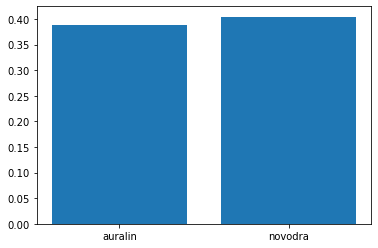

In [77]:
# visualise this difference 
plt.bar(hba1c_diff.index, hba1c_diff);

As can be seen, auralin has a lower hba1c change on average than novodra, more importantly, the change is only very little and campares competitvely in efficacy.

Let's also observe the rate of adverse reactions in both drug types

In [85]:
# group the reactions by the treatment type
reaction_diff = treatment.groupby(['treatment','adverse_reaction']).size()
reaction_diff = reaction_diff.reset_index(name='count')
reaction_diff

,treatment,adverse_reaction,count
0,auralin,headache,1
1,auralin,hypoglycemia,10
2,auralin,nausea,1
3,auralin,throat irritation,2
4,novodra,cough,1
5,novodra,headache,2
6,novodra,hypoglycemia,10
7,novodra,injection site discomfort,6
8,novodra,nausea,1


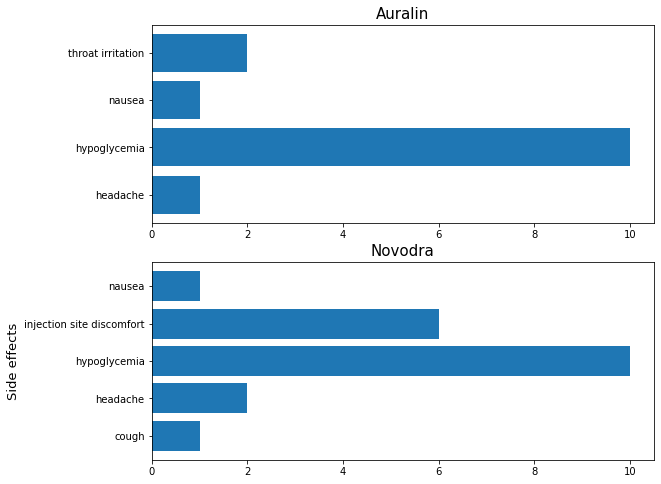

In [101]:
plt.figure(figsize=(9,8))
drugs = ['auralin', 'novodra']
plot = 1
for drug in drugs:
    subdata = reaction_diff[reaction_diff.treatment == drug]
    plt.subplot(2,1,plot)
    plt.barh(data = subdata, y='adverse_reaction', width='count')
    plt.title(drug.title(), fontsize=15)
    plot += 1
plt.ylabel('Side effects', fontsize=13);

## Conclusion <a id='topic11'></a>

The plot reveals that auralin had even less adverse effects than novodra which is the presently used drug.

Based on these markers, it is supportedly conclusive that Auralin has passed the phase II clinical trial stage. **It qualifies in both efficacy and safety for use.**